In [1]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [12]:
print(x_train.shape, x_test.shape)

(320, 2) (80, 2)


In [14]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = 2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Batch GD

In [16]:
start = time.time()
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=320)
print(time.time()-start)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7152 - accuracy: 0.6219 - val_loss: 0.6457 - val_accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 51ms/step - loss: 0.6600 - accuracy: 0.7344 - val_loss: 0.6036 - val_accuracy: 0.7875
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 0.6237 - accuracy: 0.7625 - val_loss: 0.5688 - val_accuracy: 0.8750
Epoch 4/10
1/1 [==============================] - 0s 32ms/step - loss: 0.5950 - accuracy: 0.7875 - val_loss: 0.5384 - val_accuracy: 0.8750
Epoch 5/10
1/1 [==============================] - 0s 38ms/step - loss: 0.5704 - accuracy: 0.8094 - val_loss: 0.5112 - val_accuracy: 0.8875
Epoch 6/10
1/1 [==============================] - 0s 38ms/step - loss: 0.5488 - accuracy: 0.8188 - val_loss: 0.4868 - val_accuracy: 0.8750
Epoch 7/10
1/1 [==============================] - 0s 31ms/step - loss: 0.5296 - accuracy: 0.8375 - val_loss: 0.4649 - val_accuracy: 0.8875
Epoch 8/10
1/1 [=============

In [ ]:
# BGD : Time : 1.4552509784698486  : loss: 0.4827 - accuracy: 0.8562 - val_loss: 0.4097 - val_accuracy: 0.8875

# SGD

In [17]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim = 2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [18]:
model1.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
start = time.time()
history1 = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=1)
print(time.time()-start)

Epoch 1/10
320/320 [==============================] - 2s 4ms/step - loss: 0.4044 - accuracy: 0.8156 - val_loss: 0.1880 - val_accuracy: 0.9250
Epoch 2/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3009 - accuracy: 0.8969 - val_loss: 0.1590 - val_accuracy: 0.9500
Epoch 3/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2967 - accuracy: 0.8906 - val_loss: 0.1568 - val_accuracy: 0.9500
Epoch 4/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2794 - accuracy: 0.9000 - val_loss: 0.1961 - val_accuracy: 0.9375
Epoch 5/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3095 - accuracy: 0.9094 - val_loss: 0.1868 - val_accuracy: 0.9500
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.9094 - val_loss: 0.1696 - val_accuracy: 0.9500
Epoch 7/10
320/320 [==============================] - 1s 4ms/step - loss: 0.2835 - accuracy: 0.9000 - val_loss: 0.1857 - val_accuracy: 0.9500
Epoch 

In [ ]:
# BGD : Time : 1.4552509784698486  : loss: 0.4827 - accuracy: 0.8562 - val_loss: 0.4097 - val_accuracy: 0.8875

# SGD : Time : 11.382084608078003 : loss: 0.3006 - accuracy: 0.9062 - val_loss: 0.1735 - val_accuracy: 0.9500

# MBGD

In [20]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim = 2))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
start = time.time()
history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=100)
print(time.time()-start)

Epoch 1/10
4/4 [==============================] - 1s 131ms/step - loss: 0.6305 - accuracy: 0.6750 - val_loss: 0.5125 - val_accuracy: 0.8500
Epoch 2/10
4/4 [==============================] - 0s 37ms/step - loss: 0.5221 - accuracy: 0.8156 - val_loss: 0.4377 - val_accuracy: 0.9000
Epoch 3/10
4/4 [==============================] - 0s 24ms/step - loss: 0.4720 - accuracy: 0.8313 - val_loss: 0.3868 - val_accuracy: 0.9125
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.4373 - accuracy: 0.8406 - val_loss: 0.3435 - val_accuracy: 0.9000
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.4085 - accuracy: 0.8531 - val_loss: 0.3127 - val_accuracy: 0.9000
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 0.3863 - accuracy: 0.8844 - val_loss: 0.2866 - val_accuracy: 0.9250
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 0.3650 - accuracy: 0.8906 - val_loss: 0.2598 - val_accuracy: 0.9250
Epoch 8/10
4/4 [==========

In [ ]:
# BGD : Time : 1.4552509784698486  : loss: 0.4827 - accuracy: 0.8562 - val_loss: 0.4097 - val_accuracy: 0.8875

# MBGD : Time : 3.066321849822998 : loss: 0.3202 - accuracy: 0.8969 - val_loss: 0.2096 - val_accuracy: 0.9375

# SGD : Time : 11.382084608078003 : loss: 0.3006 - accuracy: 0.9062 - val_loss: 0.1735 - val_accuracy: 0.9500

# Visualization

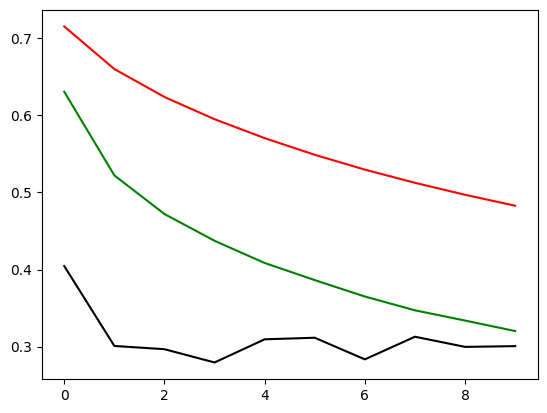

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red')
plt.plot(history1.history['loss'],color='black')
plt.plot(history2.history['loss'],  color='green')